In [113]:

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [114]:
dataset = pd.read_csv('./heart.csv')

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [116]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


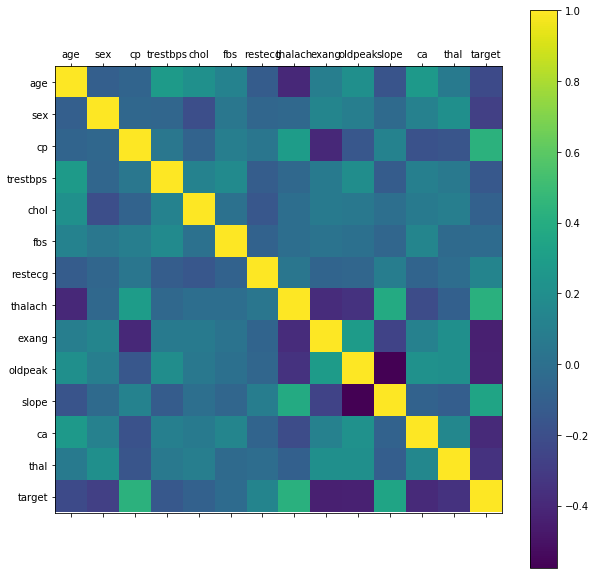

In [117]:
rcParams['figure.figsize'] = 10, 10
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22b609b0>,
      dtype=object)

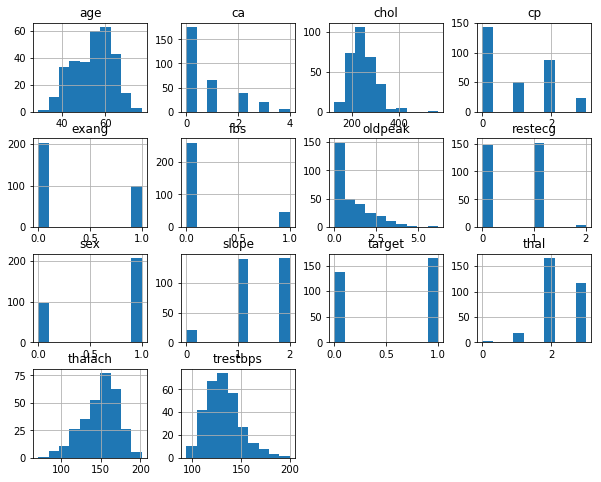

In [118]:
dataset.hist(figsize = (10,8))

### Data Processing

In [119]:
# Create dummies for categorical variables in order to quantify them.
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# Scale variables so they all have the same range. This standardization is important for modeling.
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [120]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f79a780>,
      dtype=object)

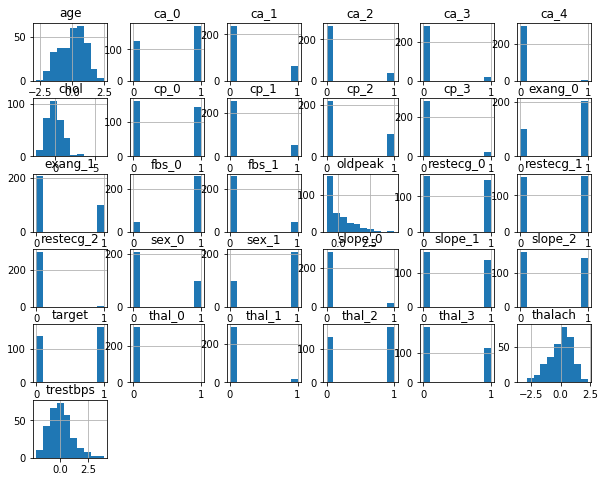

In [121]:
dataset.hist(figsize = (10,8))

In [226]:
y = dataset['target']
# Remove target column from training data
X = dataset.drop(['target'], axis = 1)
# Separate test data from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [227]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

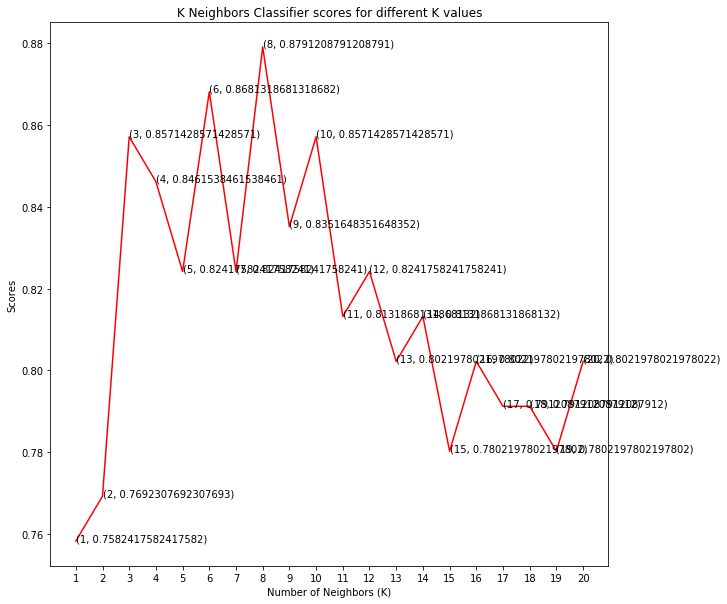

In [228]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [229]:
Xnew = pd.read_csv('./heart.csv')
# Drop target column
Xnew = Xnew.drop('target', axis=1)

In [230]:
# Create dummies for categorical variables in order to quantify them.
Xnew = pd.get_dummies(Xnew, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [231]:
# Scale variables so they all have the same range. This standardization is important for modeling.
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Xnew[columns_to_scale] = standardScaler.fit_transform(Xnew[columns_to_scale])

In [234]:
Xsample = Xnew.loc[[18]]

In [235]:
knn_classifier.predict(Xsample)

array([1])

### Reduce the features in the dataset to just include CP, Thalach, Slope; the ones that had some correlation with the target.

In [125]:
# dataset_reduced = dataset['cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0', 'slope_1', 'slope_2']

In [126]:
list(dataset)

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'target',
 'sex_0',
 'sex_1',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [127]:
dataset_reduced = dataset.drop(['age',
 'trestbps',
 'chol',
 'oldpeak',
 'target',
 'sex_0',
 'sex_1',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3'], axis=1)

In [128]:
dataset_reduced.describe()

,thalach,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2
count,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-5.203025e-16,0.471947,0.165017,0.287129,0.075908,0.069307,0.462046,0.468647
std,1.001654e+00,0.500038,0.371809,0.453171,0.265288,0.254395,0.499382,0.499842
min,-3.439267e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.061105e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.466343e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.151309e-01,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.289429e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
X = dataset_reduced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [130]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

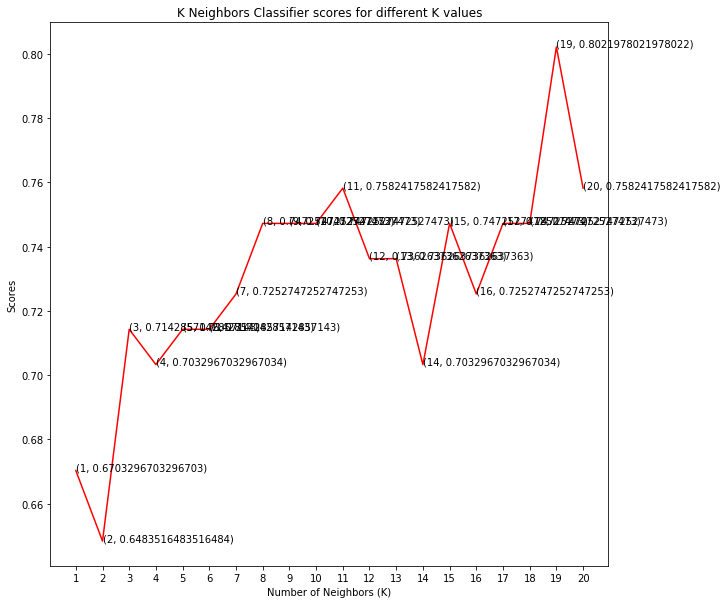

In [131]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Conclusion: The model lost accuracy when I chose just the three features with best correlation to target variable. 

### Use PCA to reduce dimensionality

In [225]:
features = ['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_0',
 'sex_1',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 
                          'principal component 2', 
                          'principal component 3', 
                          'principal component 4',
                          'principal component 5',
                          'principal component 6',
                          'principal component 7',
                          'principal component 8',
                          'principal component 9',
                          'principal component 10',
                          'principal component 11',
                          'principal component 12'])

In [177]:
finalDf = pd.concat([principalDf, dataset[['target']]], axis = 1)

In [178]:
finalDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,target
0,1.169135,0.955204,5.079587,-0.313413,4.169772,-0.172466,-0.563101,1.981595,2.128828,-1.379384,-0.727507,0.534010,1
1,-1.736814,-1.058860,0.337426,0.673807,3.339544,0.429359,-0.142988,-1.712713,2.115153,-0.731104,0.917966,-0.628482,1
2,-3.055354,1.144542,-0.543081,-1.605435,0.460535,-1.159036,-0.196980,0.457412,0.012419,0.562666,-0.599223,-0.689793,1
3,-2.924298,-1.556222,-0.180629,-0.241740,0.071264,-0.460013,-1.036270,0.786445,0.334864,0.547224,-1.131610,-0.235256,1
4,-0.883046,0.992350,-2.235113,0.946432,-0.985275,-2.810794,0.049862,-0.795785,0.464882,-0.098335,-0.122248,-0.097567,1
5,0.595581,-1.298385,-0.423873,0.811853,1.895501,0.842083,-0.176991,2.891824,0.185510,1.065076,0.208561,1.114576,1
6,-1.362562,2.688599,-1.042049,-1.138886,0.850057,0.085438,-0.207250,0.834929,-1.141168,0.510453,-1.632159,-1.140432,1
7,-2.091695,-2.726879,-0.057369,-0.223407,0.051686,-0.554346,-1.261027,-0.429050,-0.864469,0.919660,-1.790965,-0.160158,1
8,-1.045224,-1.201087,3.817446,2.245940,0.361584,-0.241662,0.180040,-1.630481,-0.664122,-0.064517,-0.549868,0.297124,1
9,-2.446083,-1.134488,0.441756,0.642132,0.765379,0.713225,-0.163770,-0.696651,0.814420,-0.629827,0.932682,0.516600,1


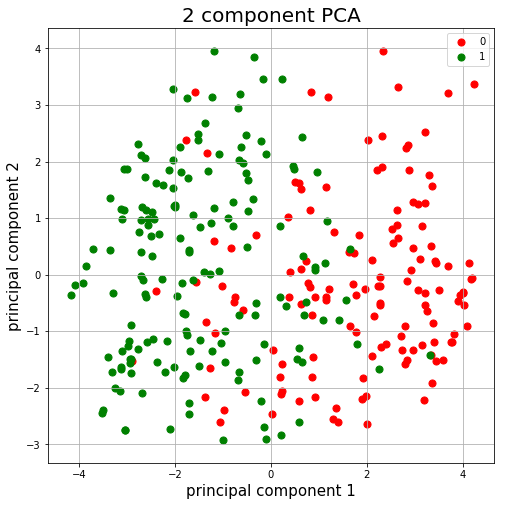

In [179]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [180]:
y = finalDf['target']
# Remove target column from training data
X = finalDf.drop(['target'], axis = 1)
# Separate test data from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [181]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

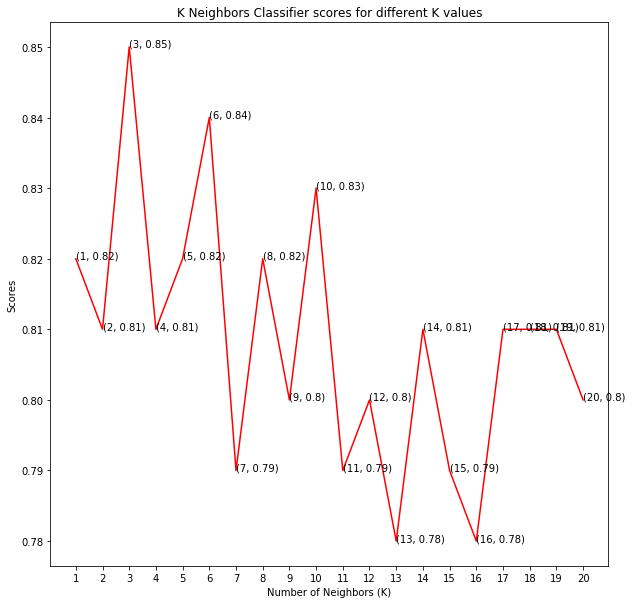

In [182]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Erroneous Conclusion: Using PCA, with 12 principle components, and k-nearest neighbors, with k=8, we were able to achieve knn score of 0.9, compared to 0.879 without PCA.

It turns out I included the target in the PCA training and testing.

### Predict the outcome of an individual

In [213]:
Xnew = pd.read_csv('./heart.csv')

In [214]:
Xnew.head(200)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [215]:
# Drop target column
Xnew = Xnew.drop('target', axis=1)

In [216]:
Xnew.head(14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [217]:
# Create dummies for categorical variables in order to quantify them.
Xnew = pd.get_dummies(Xnew, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [218]:
Xnew.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [219]:
# Scale variables so they all have the same range. This standardization is important for modeling.
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Xnew[columns_to_scale] = standardScaler.fit_transform(Xnew[columns_to_scale])

In [220]:
Xnew.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [221]:
Xsample = Xnew.loc[[183]]

In [222]:
Xsample.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
183,0.400752,-1.12077,-0.31431,0.6714,1.259877,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [209]:
Xsample_principalComponents = pca.transform(Xsample)
Xsample_principalDf = pd.DataFrame(data = Xsample_principalComponents, columns = ['principal component 1', 
                          'principal component 2', 
                          'principal component 3', 
                          'principal component 4',
                          'principal component 5',
                          'principal component 6',
                          'principal component 7',
                          'principal component 8',
                          'principal component 9',
                          'principal component 10',
                          'principal component 11',
                          'principal component 12'])

In [210]:
Xsample_principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12
0,-0.682274,-0.037237,1.138551,-0.391231,1.057163,0.28801,0.783711,-0.113207,0.468131,-0.043621,0.499587,0.092857


In [223]:
Xsample_PCA = pca.transform(Xsample)

In [224]:
prediction = knn_classifier.predict(Xsample_PCA)
print(prediction)

[0]
